In [1]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
# Global Constants
REWARD_TOKEN_TOTAL_SUPPLY = 100_000_000  # Total supply of Reward tokens
BURNING_TOKEN_SUPPLY = 60_000_000  # Total supply of the token to be burnt

# Burning Budgets Percentages
BURNING_EMISSION_BUDGET_PERCENT = 0.05  # 5% of Reward Token total supply
STREAM_BURNING_EMISSION_BUDGET_PERCENT = 0.90  # 90% of burning emission
INSTANT_BURNING_EMISSION_BUDGET_PERCENT = 0.10  # 10% of burning emission

BURNING_EMISSION_BUDGET = REWARD_TOKEN_TOTAL_SUPPLY * BURNING_EMISSION_BUDGET_PERCENT

# Instant Burning Emission Budget
INSTANT_BURNING_EMISSION_BUDGET = REWARD_TOKEN_TOTAL_SUPPLY * BURNING_EMISSION_BUDGET_PERCENT * INSTANT_BURNING_EMISSION_BUDGET_PERCENT
# Instant Burning Conversion Rate
INSTANT_BURNING_CONVERSION_RATE = INSTANT_BURNING_EMISSION_BUDGET / BURNING_TOKEN_SUPPLY 

# Stream Burning Emission Budget
STREAM_BURNING_EMISSION_BUDGET = REWARD_TOKEN_TOTAL_SUPPLY * BURNING_EMISSION_BUDGET_PERCENT * STREAM_BURNING_EMISSION_BUDGET_PERCENT
# Stream Burning Conversion Rate
STREAM_BURNING_CONVERSION_RATE = STREAM_BURNING_EMISSION_BUDGET / BURNING_TOKEN_SUPPLY 

# Program Duration
PROGRAM_DURATION = 365


In [3]:
# BurningProgram Class
class BurningProgram:
    def __init__(self):
        self.burners = {}  # Store burner info
        self.instant_burn_emission = 0
        self.stream_burn_emission = 0

    def burn(self, burner, burn_amount, is_instant):
        if is_instant:
            self.instant_burn(burner, burn_amount)
        else:
            self.stream_burn(burner, burn_amount)

    def instant_burn(self, burner, burn_amount):
        # stop burning if total supply of ALFA is burnt
        if self.aggregate_burns() > BURNING_TOKEN_SUPPLY:
            return
        
        # stop burning if instant burning emission budget is distributed
        if self.instant_burn_emission > INSTANT_BURNING_EMISSION_BUDGET:
            return
        
        emission = EmissionRegulator.calculate_instant_burn_emission(burn_amount)

        self.burners[burner] = {
            'burnt_amount': burn_amount,
            'annualized_emission': emission
        }

        self.instant_burn_emission += emission

    def stream_burn(self, burner, burn_amount):
        # stop burning if total supply of ALFA is burnt
        if self.aggregate_burns() > BURNING_TOKEN_SUPPLY:
            return
        
        # stop burning if stream burning emission budget is distributed
        if self.stream_burn_emission > STREAM_BURNING_EMISSION_BUDGET:
            return
        
        emission = EmissionRegulator.calculate_stream_burn_emission(burn_amount)

        self.burners[burner] = {
            'burnt_amount': burn_amount,
            'annualized_emission': emission
        }

        self.stream_burn_emission += emission

    def aggregate_burns(self):
        total_burned = sum(burner_info['burnt_amount'] for burner_info in self.burners.values())
        return total_burned
    
    def aggregate_emission(self):
        return sum(burner_info['annualized_emission'] for burner_info in self.burners.values())
    
# EmissionRegulator Class
class EmissionRegulator:

    def calculate_instant_burn_emission(burn_amount):
        return burn_amount * INSTANT_BURNING_CONVERSION_RATE
    
    def calculate_stream_burn_emission(burn_amount):
        return burn_amount * STREAM_BURNING_CONVERSION_RATE



In [4]:

# Initialize Programs
burning_program = BurningProgram()
emission_regulator = EmissionRegulator()


In [5]:
# Output Observability functions

# Plotting burning emissions over time
def plot_burning_output(timestamps, burning_emissions, instant_emissions_over_time, stream_emissions_over_time):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, burning_emissions, linestyle='-', color='b', label='Cumulative Burning Emission Over Time')
    plt.plot(timestamps, instant_emissions_over_time, linestyle='-', color='r', label='Cumulative Instant Burning Emission Over Time')
    plt.plot(timestamps, stream_emissions_over_time, linestyle='-', color='g', label='Cumulative Stream Burning Emission Over Time')
    plt.xlabel('Time')
    plt.ylabel('Reward Emission')
    plt.title('Reward Emission Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting Circulating supply function over time
def plot_burning_token_supply_output(timestamps, burning_token_supply):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, burning_token_supply, linestyle='-', color='g', label='Burning Token Supply')
    plt.xlabel('Time')
    plt.ylabel('Circulating Burning Token Supply')
    plt.title('Burning Token Supply Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()


In [6]:
# Scenario generation function

# Burning
def generate_burning_scenarios(alfa_burn_program, num_burn_events, max_burn_amount):
    # Initialize the scenario results
    alfa_supply_over_time = []
    emissions_over_time = []
    instant_emissions_over_time = []
    stream_emissions_over_time = []
    timestamps = []
    
    # Define start time
    start_time = datetime.today()

    for i in range(num_burn_events):
        # Generate random burn data
        burner_name = f"burner_{i + 1}"
        # burn_amount = 6000
        burn_amount = random.randint(10, max_burn_amount)  # Random burn amount
        # is_instant = False
        is_instant = bool(random.getrandbits(1))

        # Apply the burn event
        burning_program.burn(burner_name, burn_amount, is_instant)

        # Record the total emission and timestamp after the burn
        current_time = start_time + timedelta(days=(i * PROGRAM_DURATION / num_burn_events))
        timestamps.append(current_time)
        emissions_over_time.append(burning_program.aggregate_emission())
        instant_emissions_over_time.append(burning_program.instant_burn_emission)
        stream_emissions_over_time.append(burning_program.stream_burn_emission)
        alfa_supply_over_time.append(BURNING_TOKEN_SUPPLY - burning_program.aggregate_burns())


    return timestamps, emissions_over_time, instant_emissions_over_time, stream_emissions_over_time, alfa_supply_over_time


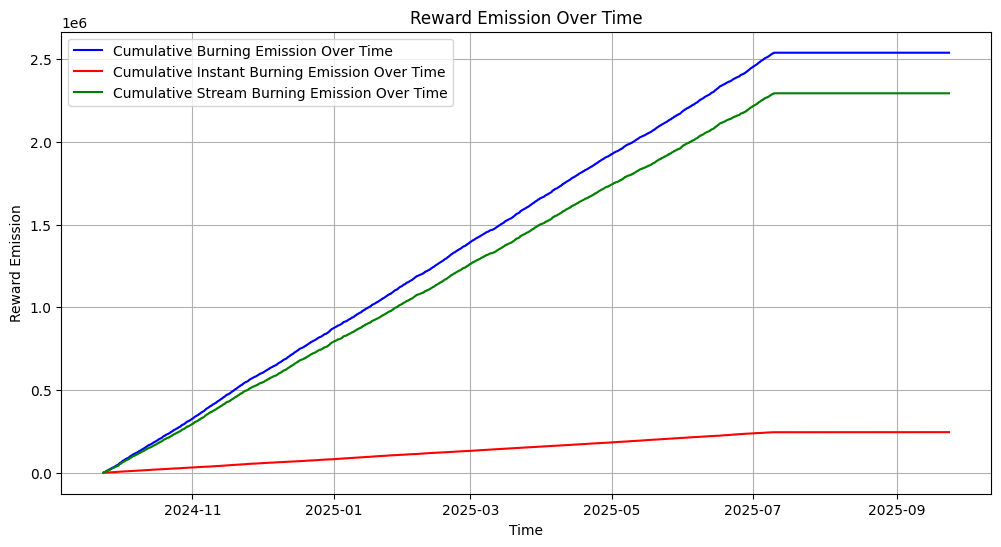

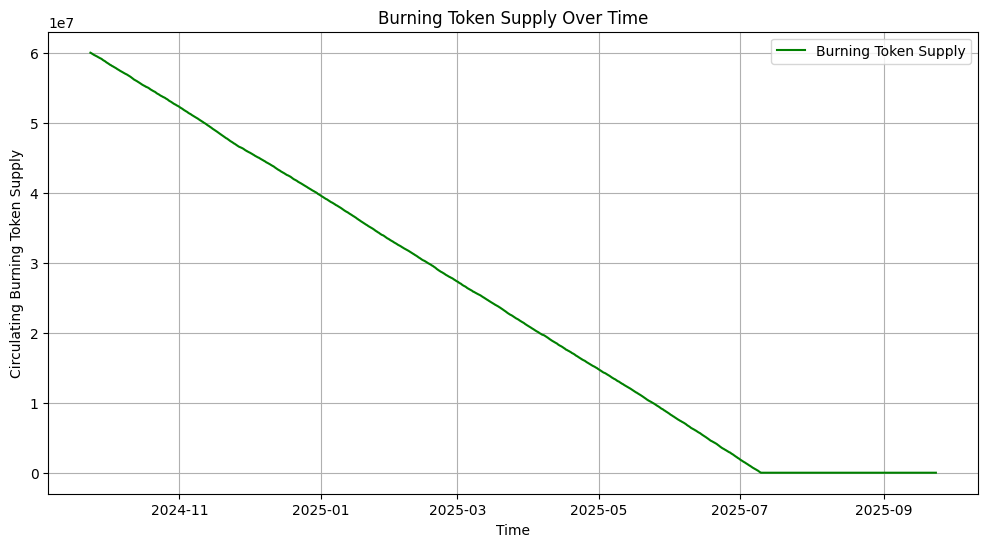

In [7]:
# Scenario Variables :
num_burn_events=10000
max_burn_amount=15000

# Generate scenarios
timestamps, burning_emissions, instant_emissions_over_time, stream_emissions_over_time, alfa_supply = generate_burning_scenarios(burning_program, num_burn_events, max_burn_amount)

# Plot emissions over time
plot_burning_output(timestamps, burning_emissions, instant_emissions_over_time, stream_emissions_over_time)
plot_burning_token_supply_output(timestamps, alfa_supply)

